In [87]:
#%%writefile 'inv201912300918.py'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os


def getResult(x):
    if(x.结存_x==x.结存_y):
        return '相等'
    elif((x.盘点差>=-0.15) & (x.盘点差<0.05)):
        return '合格'
    elif(((x.盘点差>=-1.5) & (x.盘点差<-0.15)) | ((x.盘点差>=0.05) & (x.盘点差<1))):
        return '有差'
    elif((x.盘点差<-1.5) | (x.盘点差>=1)):
        return '差大'
    
pd.set_option('max_columns', 20)
pd.set_option('max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # 禁用科学计数法
#pd.set_option('display.max_rows',None)

#打开文件
df_ERP_output_stock1 = pd.read_excel(r'I:\\#Data\\201912\\20191228\\12限额领料单列表.XLS',usecols=[2,3,6,4]).fillna(0)
df_ERP_output_stock2 = pd.read_excel(r'I:\\#Data\\201912\\20191228\\1限额领料单列表.XLS',usecols=[2,3,4,6]).fillna(0)
df_bar_output_stock1 = pd.read_excel(r'I:\\#Data\\201912\\20191228\\1领料出库单列表.XLSx',usecols=[6,10]).fillna(0)
df_erp_inv = pd.read_excel(r'I:\\#Data\\201912\\20191228\\库存展望.XLS',usecols=[6,7,8,9,10,11]).fillna(0)
df_bar_inv = pd.read_excel(r'I:\\#Data\\201912\\20191228\\库存汇总表.xlsx',usecols=[0,6])
df_stagnate = pd.read_excel(r'I:\\#Data\\201912\\20191228\\盘点完成.xlsx',usecols=[0,4,7])
#df_inv_check = pd.read_excel(r'I:\\#Data\\201912\\20191228\\库存盘点单列表.xlsx',usecols=[0,1,2,4,5,6,7,8,9])
#df_erp_inv=df_erp_inv.iloc[0:10]
df11 = pd.pivot_table(df_ERP_output_stock1,values='计划出库数量',index='材料编码',aggfunc='sum')
df12 = pd.pivot_table(df_ERP_output_stock2,values='计划出库数量',index='材料编码',aggfunc='sum')
    
#df1是ERP结存
df1 = pd.merge(df_erp_inv,df11,left_on='存货编码',right_on='材料编码',how='left').fillna(0)
df1 = pd.merge(df1,df12,left_on='存货编码',right_on='材料编码',how='left').fillna(0)
df1['现存量']=df1['现存量'].astype('float')
df1['结存'] = df1.apply(lambda x:x.现存量-x.计划出库数量_x-x.计划出库数量_y,axis=1)
#df1
#########################################################################
    
#1月份出库合计
df21 =pd.pivot_table(df_bar_output_stock1,values='计划数量',index='资材编号',aggfunc='sum')
    
#12月份条码结存
df2 = pd.merge(df_bar_inv,df21,on='资材编号',how='left').fillna(0)
df2['结存'] = df2.apply(lambda x:x.期末数量+x.计划数量,axis=1)
    
##########################################################################
df0 = pd.merge(df1,df2,left_on='存货编码',right_on='资材编号',how='inner')
df = pd.merge(df0,df_stagnate,on='存货编码',how='left').fillna(0)
df['出库率'] = df.apply(lambda x:'高' if((x.计划出库数量_x+x.计划出库数量_y)>0) else '低',axis=1)
df['盘点差'] = df.apply(lambda x:0 if(x.结存_x==0) else (x.结存_x-x.结存_y)/x.结存_x,axis=1)
df['结论'] = df.apply(lambda x:getResult(x),axis=1)

#选择数据后，不能进行数据透视表操作
#df = df[['存货编码','存货名称','规格型号','单位','库管员','结存_x','结存_y','出库率','盘点差','现存量_y','类别','结论']]

###########################################################################
df = df.pivot_table(index='库管员',columns='结论',values='资材编号',aggfunc='count',margins=True,margins_name='合计')
#计算百分比
df['合格A1']=df.apply(lambda x:x.合格/x.合计*100,axis=1)
df['差大A']=df.apply(lambda x:x.差大/x.合计*100,axis=1)
df['有差A']=df.apply(lambda x:x.有差/x.合计*100,axis=1)
df['相等A']=df.apply(lambda x:x.相等/x.合计*100,axis=1)
df['合格A']=df.apply(lambda x:x.合格A1+x.相等A,axis=1)
#df.sort_values(by=['合格A'],ascending=True)

df.reset_index()
df = df[0:9].sort_values(by=['合格A'],ascending=False)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [88]:
df

结论,合格,差大,有差,相等,合计,合格A1,差大A,有差A,相等A,合格A
库管员,,,,,,,,,,
任亚萍,150,48,136,576,910,16.48,5.27,14.95,63.30,79.78
井海峰,108,19,117,290,534,20.22,3.56,21.91,54.31,74.53
黄明喜,174,61,200,288,723,24.07,8.44,27.66,39.83,63.90
谈文丽,188,114,240,349,891,21.10,12.79,26.94,39.17,60.27
齐华香,205,74,214,180,673,30.46,11.00,31.80,26.75,57.21
邢宝华,117,28,159,97,401,29.18,6.98,39.65,24.19,53.37
吕永全,138,78,211,136,563,24.51,13.85,37.48,24.16,48.67
蒋鹏,212,72,335,72,691,30.68,10.42,48.48,10.42,41.10
安振东,119,114,381,83,697,17.07,16.36,54.66,11.91,28.98


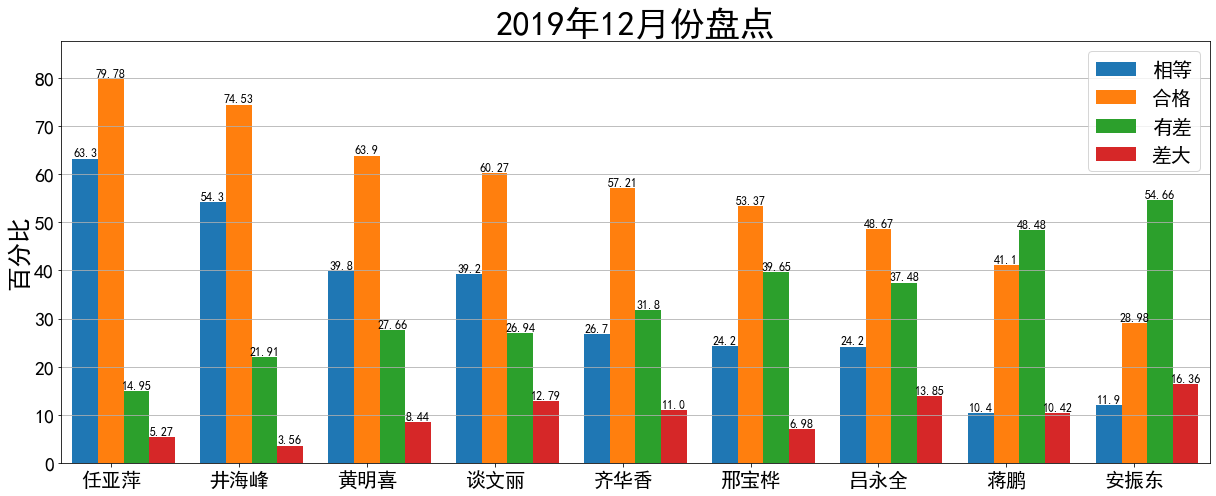

In [112]:
plt.figure(figsize=(17,7))
plt.rcParams['font.sans-serif']='SimHei'
plt.subplot(1,1,1,xmargin=0.01,ymargin=0.1)

#x = ['井海峰','蒋鹏','黄明喜','吕永全','齐华香','任亚萍','谈文丽','安振东','邢宝桦']
x = np.array([1,2,3,4,5,6,7,8,9])
#y1 = np.array([108,150,138,119,212,188,117,174,205])
#y2 = np.array([108,150,138,119,212,188,117,174,205])
y1 = np.array(list(df['相等A'][0:9]))
y2 = np.array(list(df['合格A'][0:9]))
y3 = np.array(list(df['有差A'][0:9]))
y4 = np.array(list(df['差大A'][0:9]))
plt.bar(x,y1,width=0.2,label="相等")
plt.bar(x+0.2,y2,width=0.2,label="合格")
plt.bar(x+0.4,y3,width=0.2,label="有差")
plt.bar(x+0.6,y4,width=0.2,label="差大")

#设置数据标签
for a,b in zip(x,y1):
    plt.text(a,b,round(b,1),ha='center',va='bottom',fontsize=12)
for a,b in zip(x,y2):
    plt.text(a+0.2,b,round(b,2),ha='center',va='bottom',fontsize=12)
for a,b in zip(x,y3):
    plt.text(a+0.4,b,round(b,2),ha='center',va='bottom',fontsize=12)
for a,b in zip(x,y4):
    plt.text(a+0.6,b,round(b,2),ha='center',va='bottom',fontsize=12)
plt.legend(fontsize=20)
#plt.xlabel('姓名',fontsize=15,labelpad=1)
plt.ylabel('百分比',fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(x+0.2,['任亚萍','井海峰','黄明喜','谈文丽','齐华香','邢宝桦','吕永全','蒋鹏','安振东'],fontsize=20) #,rotation=12
plt.title(label='2019年12月份盘点',fontsize=35)
plt.grid(b=True,axis='y') 
plt.subplots_adjust(left=0,bottom=0,right=1,top=10,wspace=5,hspace=55)
plt.tight_layout()
plt.savefig('盘点结果.jpg')

In [110]:
#导出到Excel
df.to_excel(excel_writer=r'I:/#Data/201912/20191228/盘点数据20191228.xlsx')

In [ ]:
plt.figure(figsize=(17,25))
plt.rcParams['font.sans-serif']='SimHei'
#person = ['井海峰','蒋鹏','黄明喜','吕永全','齐华香','任亚萍','谈文丽','安振东','邢宝桦']
i=0
for p in person:
    i = i + 1
    plt.subplot(5,2,i,xmargin=0.01,ymargin=0.1)
    x = df3['日期']
    y = df3[p]
    plt.bar(x,y,label="件数")
    plt.legend(fontsize=12)
    plt.xlabel('日期',fontsize=13,labelpad=1)
    plt.ylabel('件数',fontsize=13)
    #plt.xtick(rotation=12)
    plt.title(label='['+p+']12月份盘点件数',fontsize=20)
    
plt.subplots_adjust(left=0,bottom=0,right=1,top=10,wspace=5,hspace=55)
plt.tight_layout()
#plt.savefig('test181518.jpg')
